 <div class="alert alert-success">
<div>
$
Author  : Adithia Jovandy
$

## Shortcut

* [Fuzzyfikasi](#Fuzzy)
* [Evaluasi Rule](#rules)
* [Mekanisme Interferensi](#interferensi)
* [Defuzzyfikasi](#defuzzyfikasi)




 <div class="alert alert-warning">
<div>


# Sistem Predeksi  Suhu Ruangan Dengan Logika Fuzzy Metode Mamdani


--------------------------------------
Suhu adalah suatu besaran yang menunjukan derajat suatu benda. Benda yang memiliki panas akan menunjukan suhu yang tinggi daripada benda dingin. sering kita menyebutkan suatu benda panas atau dingin dengan menyentuh benda tersebut dengan alat indra kita, walaupun kita tidak dapat menyimpulkan berapa derajat panas dari benda tersebut dengan tepat, untuk mengetahui seberapa besar suhu tersebut maka digunakanlah beberapa metode dengan alat pengukur suhu.

Dari latar belakang tersebut, setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:

### Input

Besar Ruangan Dosen
- **kecil**  : 1-100 m^2
- **sedang** : 50-150 m^2
- **besar**  : 100-200 m^2 

Jumlah Orang
- **sepi** : 1-50 orang
- **pas**  : 25-75 orang
- **ramai**  : 50-100 orang

Jumlah AC
- **sedikit** : 1-5 AC
- **rata**    : 2-8 AC
- **banyak**  : 5-10 AC

Spesifikasi AC
- **kecil**   : 1-5 AC
- **sedang**  : 2-8 AC
- **besar**   : 5-10 AC

### Output

Suhu
- **Dingin**  : 1-15 celcius
- **Sedang**  : 7-22 celcius
- **panas**  : 15-30 celcius



#  Mengimpor Library Untuk Fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

## Fuzzyfikasi <a class="anchor" id="Fuzzy"></a>

### Menentukan variabel dan semesta pembicaraan

In [2]:
besarruangdosen =ctrl.Antecedent(np.arange(1, 201, 1), 'besar ruang dosen')
orang = ctrl.Antecedent(np.arange(1, 101, 1), 'jumlah orang')
ac = ctrl.Antecedent(np.arange(1, 11, 1), 'jumlah ac')
spekac = ctrl.Antecedent(np.arange(1, 11, 1), 'spesifikasi ac')
suhu = ctrl.Consequent(np.arange(1, 31, 1), 'suhu')

<font color='green'>
Penggunaan `antecedent` adalah suatu input yang akan kita gunakan, dan `consequent` sebagai kesimpulan atau outputnya yang akan kita gunakan nantu. Angka didalam kurung merupakan batas awal, batas akhir, dan kelipatannya _**(start,stop,Stride)**_. Kemudian penamaan label dan variabelnya.

 <div class="alert alert-warning">
<div>


### Menentukan Himpunan Fuzzy
Selanjutnya, ketika sudah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, dilanjutkan dengan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:

<font color='green'>
    
Pada fuzzy terdapat beberapa fungsi keanggotaan, yang bisa direpresentasikan dalam beberapa format, salah satunya adalah kurva Trapesium dan segitiga. Berikut adalah persamaan pada kurva Trapesium dan Segitiga 


 <div class="alert alert-success">
<div>
 **persamaan Kurva Trapesium**   
.    


$ µ[Trapesium] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq d \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       1 & \mbox{; }b  \leq x \leq c\\
       {d-x \over d-c} & \mbox{; } c < x < d\\ 
    \end{array}
\right.$ 
.  

.  

**persamaan Kurva Trapesium segitiga**  
.  

$ µ[Segitiga] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq c \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       {c-x \over c-b} & \mbox{; }b < x < c\\ 
    \end{array}
\right.$ 


</div>



 <div class="alert alert-warning">
<div>


### Menentukan Himpunan Fuzzy
Selanjutnya, ketika sudah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, dilanjutkan dengan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:

Pada dasarnya Kurva Trapesium atau Kurva segitiga adalah linear , hanya saya ada tambahan sedikit contohnya pada trapesium ada keadaan 1, sedangkan pada segitiga  keadaan 1 hanya pada titik tengah(nilai tengah)

Karena kita akan menggunakan kurva segitiga, dan Trapesium , maka fungsi yang akan digunakan adalah `fuzz.trimf` dan juga `fuzz.trapmf` lalu untuk mendefinisikan domainnya, digunakan `variabel.universe` yang selanjutnya memasukkan batas-batasnya (domain), formatnya Kurva segitiga adalah `[batas awal, titik puncak, batas akhir]`. Perintahnya adalah:
`variabel['nama himpunan fuzzy'] = fuzz.trimf(variabel.universe, [batas awal, titik puncak, batas akhir])`
sedangkan format kurva trapesium adalah `[titik a,b,c dan d]`.perintahnya adalah :
`variabel['nama himpunan fuzzy'] = fuzz.trapmf(variabel.universe, [titik a,b,c, dan d])`

# Fungsi Keanggotaan Besar ruang dosen

In [3]:
besarruangdosen['small'] = fuzz.trapmf(besarruangdosen.universe, [1, 1, 50 ,100])
besarruangdosen['normal'] = fuzz.trimf(besarruangdosen.universe, [50, 100, 150])
besarruangdosen['large'] = fuzz.trapmf(besarruangdosen.universe, [100,150,201,201])

# Fungsi Keanggotaan Jumlah orang

In [4]:
orang['sepi'] = fuzz.trapmf(orang.universe, [1, 1, 25 ,50])
orang['pas'] = fuzz.trimf(orang.universe, [25, 50, 75])
orang['ramai'] = fuzz.trapmf(orang.universe, [50,75,100,100])

# Fungsi Keanggotaan Jumlah AC

In [5]:
ac['sedikit'] = fuzz.trapmf(ac.universe, [1, 1, 2 ,5])
ac['rata'] = fuzz.trimf(ac.universe, [2, 5, 8])
ac['banyak'] = fuzz.trapmf(ac.universe, [5,8,10,10])

# Fungsi Keanggotaan Spesifikasi AC

In [6]:
spekac['kecil'] = fuzz.trapmf(spekac.universe, [1, 1, 2 ,5])
spekac['sedang'] = fuzz.trimf(spekac.universe, [2, 5, 8])
spekac['besar'] = fuzz.trapmf(spekac.universe, [5,8,10,10])

Selanjutnya kita akan memvisualisasikan Fungsi keanggotaan dari input, perintahnya seperti berikut :

# Persamaan dan Visualisasi Input

 <div class="alert alert-success">
<div>

$Besarruangdosen [small] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }1 \leq x \leq 50 \\
       {100-x \over 100-50} & \mbox{; } 50 < x < 100 \\
       0 & \mbox{; } x \geq 100
    \end{array}
\right.$ 

___

$Besarruangdosen [normal] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 50,OR,x \geq 150 \\
       {x-50 \over 100-50} & \mbox{; } 50 < x < 100 \\
       {150-x \over 150-100} & \mbox{; } 100 < x < 150
    \end{array}
\right.$

___

$Besarruangdosen [large] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 100 \\
       {x-100 \over 150-100} & \mbox{; } 100 < x < 150 \\
       1 & \mbox{; } 150 \leq x \leq 200
    \end{array}
\right.$

___

<div>

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


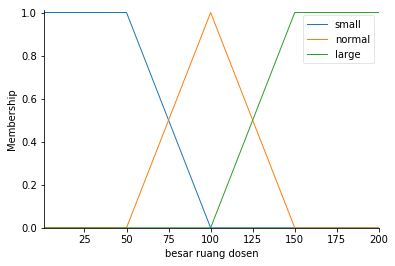

In [7]:
besarruangdosen.view()

 <div class="alert alert-success">
<div>


$Jumlahorang [sepi] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }1 \leq x \leq 25 \\
       {50-x \over 50-25} & \mbox{; } 25 < x < 50 \\
       0 & \mbox{; } x \geq 50
    \end{array}
\right.$ 
.

.  
$jumlahorang [pas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 20,OR,x \geq 75 \\
       {x-25 \over 50-25} & \mbox{; } 25 < x < 50 \\
       {75-x \over 75-50} & \mbox{; } 50 < x < 75
    \end{array}
\right.$
.  

.  
$jumlahorang [ramai] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 50 \\
       {x-50 \over 75-50} & \mbox{; } 50 < x < 75 \\
       1 & \mbox{; } 75 \leq x \leq 100
    \end{array}
\right.$



D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


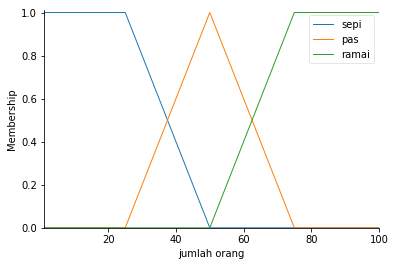

In [8]:
orang.view()

 <div class="alert alert-success">
<div>

$Jumlahac [sedikit] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }1 \leq x \leq 2 \\
       {5-x \over 5-2} & \mbox{; } 2 < x < 5 \\
       0 & \mbox{; } x \geq 5
    \end{array}
\right.$ 
.  

.  

$jumlahac [rata] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2,OR,x \geq 8 \\
       {x-2 \over 5-2} & \mbox{; } 2 < x < 5 \\
       {8-x \over 8-5} & \mbox{; } 5 < x < 8
    \end{array}
\right.$
.  

.  

$jumlahac [banyak] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 5 \\
       {x-5 \over 8-5} & \mbox{; } 5 < x < 8 \\
       1 & \mbox{; } 8 \leq x \leq 10
    \end{array}
\right.$




D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


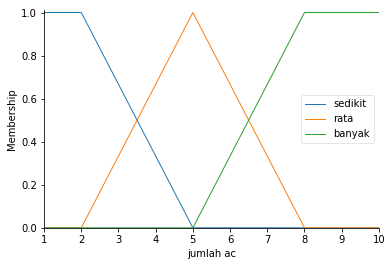

In [9]:
ac.view()

 <div class="alert alert-success">
<div>


$Spekac [kecil] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }1 \leq x \leq 2 \\
       {5-x \over 5-2} & \mbox{; } 2 < x < 5 \\
       0 & \mbox{; } x \geq 5
    \end{array}
\right.$ 
.  

.  
$spekac [sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2,OR,x \geq 8 \\
       {x-2 \over 5-2} & \mbox{; } 2 < x < 5 \\
       {8-x \over 8-5} & \mbox{; } 5 < x < 8
    \end{array}
\right.$
.  

.  

$spekac [besar] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 5 \\
       {x-5 \over 8-5} & \mbox{; } 5 < x < 8 \\
       1 & \mbox{; } 8 \leq x \leq 10
    \end{array}
\right.$





D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


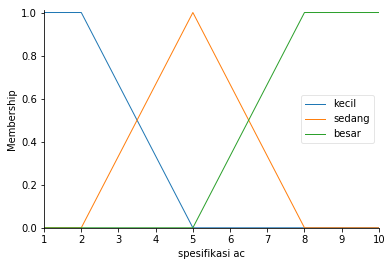

In [10]:
spekac.view()

# Fungsi Keanggotaan Suhu Ruangan

<font color='green'>
Begitu juga pada sistem output kita juga harus memuat fungsi keanggotaanya dan juga visualisasinya, perintah sebagai berikut :

In [11]:
suhu['dingin'] = fuzz.trapmf(suhu.universe, [1, 1, 7 ,15])
suhu['nyaman'] = fuzz.trimf(suhu.universe, [7, 15, 22])
suhu['panas'] = fuzz.trapmf(suhu.universe, [15,22,30,30])

# Visualisasi Output

 <div class="alert alert-success">
<div>


$Suhu [dingin] = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; }1 \leq x \leq 7 \\
       {15-x \over 15-7} & \mbox{; } 7 < x < 15 \\
       0 & \mbox{; } x \geq 15
    \end{array}
\right.$ 
.    
 
.   

$suhu [nyaman] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 7,OR,x \geq 22 \\
       {x-7 \over 15-7} & \mbox{; } 7 < x < 15 \\
       {22-x \over 22-15} & \mbox{; } 15 < x < 22
    \end{array}
\right.$
.  

.    
$suhu [panas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 15 \\
       {x-5 \over 8-5} & \mbox{; } 15 < x < 22 \\
       1 & \mbox{; } 22 \leq x \leq 30
    \end{array}
\right.$


D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


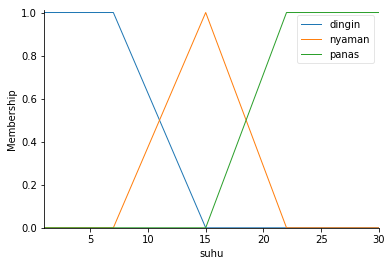

In [12]:
suhu.view()

<font color='green'>
Selanjutnya Kita akan memasukan Rules based biasanya Rules based didapatkan Dipaper dan diisi oleh para ahli/Expert pada bidangnya, berikut penentuan rules based :


# Evaluasi Rules <a class="anchor" id="rules"></a>

 <div class="alert alert-success">
<div>




|Besar Ruang Dosen   	    |   Jumlah Orang 	    |  Jumlah Ac  	    | Spesifikasi AC 	    | SUHU Ruangan	    |
|---	    |---	    |---	    |---	    |---	    |
|small      |sepi  	    |sedikit    |kecil      |nyaman     |
|small   	|sepi   	|sedikit   	|sedang     |dingin   	|
|small   	|sepi   	|sedikit   	|besar      |dingin   	|
|small   	|pas    	|rata    	|kecil   	|nyaman   	|
|small   	|pas   	    |rata   	|sedang   	|nyaman    	|
|small   	|pas   	    |rata   	|besar   	|dingin     |
|small   	|ramai   	|banyak   	|kecil   	|nyaman   	|
|small   	|ramai   	|banyak   	|sedang   	|nyaman   	|
|small   	|ramai   	|banyak   	|besar   	|nyaman   	|
|normal   	|sepi   	|sedikit   	|kecil   	|nyaman   	|
|normal   	|sepi    	|sedikit   	|sedang   	|nyaman   	|
|normal   	|sepi    	|sedikit   	|besar   	|nyaman	    |
|normal   	|pas    	|rata   	|kecil   	|nyaman     |
|normal   	|pas    	|rata   	|sedang   	|nyaman   	|
|normal   	|pas    	|rata   	|besar   	|nyaman   	|
|normal   	|ramai    	|banyak   	|kecil   	|nyaman   	|
|normal   	|ramai    	|banyak    	|sedang   	|nyaman   	|
|normal   	|ramai    	|banyak    	|besar   	|nyaman     |
|large   	|sepi   	|sedikit   	|kecil   	|nyaman   	|
|large    	|sepi   	|sedikit   	|sedang   	|nyaman   	|
|large    	|sepi   	|sedikit   	|besar   	|nyaman   	|
|large    	|pas   	    |rata   	|kecil   	|nyaman   	|
|large    	|pas    	|rata   	|sedang   	|nyaman   	|
|large    	|pas    	|rata   	|besar   	|nyaman   	|
|large    	|ramai  	|banyak   	|kecil   	|nyaman   	|
|large    	|ramai   	|banyak   	|sedang   	|nyaman   	|
|large    	|ramai   	|banyak   	|besar   	|nyaman   	|
|small   	|sepi   	|rata   	|kecil   	|nyaman   	|
|small   	|sepi   	|rata   	|sedang   	|dingin   	|
|small   	|sepi   	|rata   	|besar   	|dingin   	|
|small   	|sepi   	|banyak   	|kecil   	|dingin   	|
|small   	|sepi   	|banyak   	|sedang   	|dingin   	|
|small   	|sepi   	|banyak   	|besar   	|dingin   	|
|small   	|pas    	|sedikit   	|kecil   	|nyaman   	|
|small   	|pas    	|sedikit   	|sedang   	|nyaman   	|
|small   	|pas    	|sedikit   	|besar   	|nyaman   	|
|small   	|pas    	|banyak   	|kecil   	|nyaman   	|
|small   	|pas    	|banyak   	|sedang   	|nyaman   	|
|small   	|pas    	|banyak   	|besar   	|nyaman   	|
|small   	|ramai   	|sedikit   	|kecil   	|panas   	|
|small   	|ramai   	|sedikit   	|sedang   	|panas   	|
|small   	|ramai   	|sedikit   	|besar   	|nyaman   	|
|small   	|ramai   	|rata   	|kecil   	|nyaman   	|
|small   	|ramai   	|rata   	|sedang   	|nyaman   	|
|small   	|ramai   	|rata   	|besar   	|nyaman   	|
|normal   	|sepi    	|rata   	|kecil   	|nyaman   	|
|normal   	|sepi    	|rata   	|sedang   	|nyaman   	|
|normal   	|sepi    	|rata   	|besar   	|dingin   	|
|normal   	|sepi    	|banyak   	|kecil   	|nyaman   	|
|normal   	|sepi    	|banyak   	|sedang   	|dingin   	|
|normal   	|sepi    	|banyak   	|besar   	|dingin   	|
|normal   	|pas    	|sedikit   	|kecil   	|panas   	|
|normal   	|pas    	|sedikit   	|sedang   	|nyaman   	|
|normal   	|pas    	|sedikit   	|besar   	|nyaman   	|
|normal   	|pas    	|banyak   	|kecil   	|nyaman   	|
|normal   	|pas    	|banyak   	|sedang   	|nyaman   	|
|normal   	|pas    	|banyak   	|besar   	|dingin   	|
|normal   	|ramai   	|sedikit   	|kecil   	|panas   	|
|normal   	|ramai   	|sedikit   	|sedang   	|panas   	|
|normal   	|ramai   	|sedikit   	|besar   	|panas   	|
|normal   	|ramai   	|rata   	|kecil   	|panas   	|
|normal   	|ramai   	|rata   	|sedang   	|nyaman   	|
|normal   	|ramai   	|rata   	|besar   	|nyaman   	|
|large   	|sepi    	|rata   	|kecil   	|nyaman   	|
|large   	|sepi   	|rata   	|sedang   	|dingin     |
|large   	|sepi   	|rata   	|besar   	|dingin   	|
|large   	|sepi   	|banyak   	|kecil   	|nyaman   	|
|large   	|sepi   	|banyak   	|sedang   	|dingin   	|
|large   	|sepi   	|banyak   	|besar   	|dingin   	|
|large   	|pas    	|sedikit   	|kecil   	|panas   	|
|large   	|pas    	|sedikit   	|sedang   	|nyaman   	|
|large   	|pas    	|sedikit   	|besar   	|nyaman   	|
|large   	|pas   	    |banyak   	|kecil   	|nyaman	    |
|large   	|pas    	|banyak   	|sedang   	|nyaman     |
|large   	|pas    	|banyak   	|besar   	|dingin   	|
|large   	|ramai    	|sedikit   	|kecil   	|panas   	|
|large   	|ramai    	|sedikit   	|sedang   	|panas   	|
|large   	|ramai    	|sedikit   	|besar   	|panas   	|
|large   	|ramai    	|rata   	|kecil   	|nyaman   	|
|large   	|ramai    	|rata   	|sedang   	|nyaman   	|
|large   	|ramai    	|rata   	|besar   	|nyaman   	|

<font color='green'>
Rules based kemudian dibuat dalam sistem coding caranya seperti berikut :

In [13]:
rule1 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['sedikit'] & spekac['kecil'] , suhu['nyaman'])
rule2 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['sedikit'] & spekac['sedang'] , suhu['dingin'])
rule3 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['sedikit'] & spekac['besar'] , suhu['dingin'])
rule4 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule5 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule6 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['rata'] & spekac['besar'] , suhu['dingin'])
rule7 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule8 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule9 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['banyak'] & spekac['besar'] , suhu['nyaman'])
rule10 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['sedikit'] & spekac['kecil'] , suhu['nyaman'])
rule11 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['sedikit'] & spekac['sedang'] , suhu['nyaman'])
rule12 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule13 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule14 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule15 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['rata'] & spekac['besar'] , suhu['nyaman'])
rule16 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule17 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule18 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['banyak'] & spekac['besar'] , suhu['nyaman'])
rule19 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['sedikit'] & spekac['kecil'] , suhu['nyaman'])
rule20 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['sedikit'] & spekac['sedang'] , suhu['nyaman'])

rule21 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule22 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule23 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule24 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['rata'] & spekac['besar'] , suhu['nyaman'])
rule25 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule26 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule27 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['banyak'] & spekac['besar'] , suhu['nyaman'])
rule28 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule29 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['rata'] & spekac['sedang'] , suhu['dingin'])
rule30 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['rata'] & spekac['besar'] , suhu['dingin'])
rule31 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['banyak'] & spekac['kecil'] , suhu['dingin'])
rule32 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['banyak'] & spekac['sedang'] , suhu['dingin'])
rule33 = ctrl.Rule(besarruangdosen['small'] & orang['sepi'] & ac['banyak'] & spekac['besar'] , suhu['dingin'])
rule34 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['sedikit'] & spekac['kecil'] , suhu['nyaman'])
rule35 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['sedikit'] & spekac['sedang'] , suhu['nyaman'])
rule36 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule37 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule38 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule39 = ctrl.Rule(besarruangdosen['small'] & orang['pas'] & ac['banyak'] & spekac['besar'] , suhu['nyaman'])
rule40 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['sedikit'] & spekac['kecil'] , suhu['panas'])
rule41 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['sedikit'] & spekac['sedang'] , suhu['panas'])
rule42 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule43 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule44 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule45 = ctrl.Rule(besarruangdosen['small'] & orang['ramai'] & ac['rata'] & spekac['besar'] , suhu['nyaman'])

rule46 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule47 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule48 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['rata'] & spekac['besar'] , suhu['dingin'])
rule49 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule50 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['banyak'] & spekac['sedang'] , suhu['dingin'])
rule51 = ctrl.Rule(besarruangdosen['normal'] & orang['sepi'] & ac['banyak'] & spekac['besar'] , suhu['dingin'])
rule52 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['sedikit'] & spekac['kecil'] , suhu['panas'])
rule53 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['sedikit'] & spekac['sedang'] , suhu['nyaman'])
rule54 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule55 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule56 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule57 = ctrl.Rule(besarruangdosen['normal'] & orang['pas'] & ac['banyak'] & spekac['besar'] , suhu['dingin'])
rule58 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['sedikit'] & spekac['kecil'] , suhu['panas'])
rule59 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['sedikit'] & spekac['sedang'] , suhu['panas'])
rule60 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['sedikit'] & spekac['besar'] , suhu['panas'])
rule61 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['rata'] & spekac['kecil'] , suhu['panas'])
rule62 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule63 = ctrl.Rule(besarruangdosen['normal'] & orang['ramai'] & ac['rata'] & spekac['besar'] , suhu['nyaman'])
rule64 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule65 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['rata'] & spekac['sedang'] , suhu['dingin'])
rule66 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['rata'] & spekac['besar'] , suhu['dingin'])

rule67 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule68 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule69 = ctrl.Rule(besarruangdosen['large'] & orang['sepi'] & ac['banyak'] & spekac['besar'] , suhu['dingin'])
rule70 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['sedikit'] & spekac['kecil'] , suhu['panas'])
rule71 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['sedikit'] & spekac['sedang'] , suhu['nyaman'])
rule72 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['sedikit'] & spekac['besar'] , suhu['nyaman'])
rule73 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['banyak'] & spekac['kecil'] , suhu['nyaman'])
rule74 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['banyak'] & spekac['sedang'] , suhu['nyaman'])
rule75 = ctrl.Rule(besarruangdosen['large'] & orang['pas'] & ac['banyak'] & spekac['besar'] , suhu['dingin'])
rule76 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['sedikit'] & spekac['kecil'] , suhu['panas'])
rule77 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['sedikit'] & spekac['sedang'] , suhu['panas'])
rule78 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['sedikit'] & spekac['besar'] , suhu['panas'])
rule79 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['rata'] & spekac['kecil'] , suhu['nyaman'])
rule80 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['rata'] & spekac['sedang'] , suhu['nyaman'])
rule81 = ctrl.Rule(besarruangdosen['large'] & orang['ramai'] & ac['rata'] & spekac['besar'] , suhu['nyaman'])




<font color='green'>
Setelah rules based selesai, kita harus menggabungkan rules tersebut menjadi suatu kontrol dari sistem fuzzy agar dapat disimulasikan kedalam sistem control.

# Menggabungan Rules untuk dijadikan sebagai Kontrol Sistem Fuzzy

In [14]:
simulasi_suhu = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77, rule78, rule79, rule80, rule81])

# Visualisasi Rules  

<font color='green'>
Visualisasi rules ini menunjukan semua data rules yang diuraikan 

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


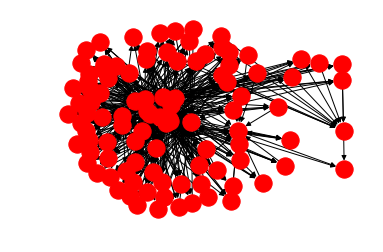

In [15]:
simulasi_suhu.view()

<font color='green'>
visualisasi Rules yang sudah diberi dilabel (digabung)

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


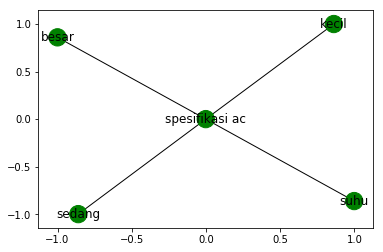

In [16]:
simulasi_suhu.view_n()

# Mensimulasikan 

In [17]:
suhu_ruangan = ctrl.ControlSystemSimulation(simulasi_suhu)

# TEST CASE

<font color='green'>
Melakukan penginputan berdasarkan Problem  yang ada

In [18]:
suhu_ruangan.input['besar ruang dosen'] = 110
suhu_ruangan.input['jumlah orang'] = 10
suhu_ruangan.input['jumlah ac'] = 2
suhu_ruangan.input['spesifikasi ac'] =2

 <div class="alert alert-warning">
<div>

Selanjutnya kita akan mencoba penghitungan manual lalu membandingkannya dengan penghitungan komputer

Diketahui disini nilai input 
Besar ruangan dosen sebesar 110 yang menunjukan ruangan ini bernilai diantara normal dan large, sedangkan jumlah orang sebanyak 10 (pas), kemudian jumlah ac sebanyak 2 (rata) dan PK AC benilai 2 (sedang), Dengan nilai ini kita dapat menghitungnya secara komputasi dan juga manual berikut adalah cara penghitungan manualnya : 


# Mekanisme Interferensi <a class="anchor" id="interferensi"></a>

 <div class="alert alert-success">
<div>


$ µ[Segitiga] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq c \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       {c-x \over c-b} & \mbox{; }b < x < c\\ 
    \end{array}
\right.$------>
$ µnormal[110] = 
\left\{
    \begin{array}{ll}
       {150-110 \over 150-100} & \mbox{; } 100 < x < 150 \\
    \end{array}
\right.$

$µnormal[110]=0.8$

.  
$ µ[Trapesium] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq d \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       1 & \mbox{; }b \leq x \leq c\\
       {d-x \over d-c} & \mbox {; }c < x < d\\ 
    \end{array}
\right.$------>
$ µlargel[110] = 
\left\{
    \begin{array}{ll}
       {110-100 \over 150-100} & \mbox{; } 100 < 110 < 150 \\
    \end{array}
\right.$

$µlarge[110]=0.2$

.  
$ µ[pas] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq d \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       1 & \mbox{; }b \leq x \leq c\\
       {d-x \over d-c} & \mbox {; } c < x < d\\ 
    \end{array}
\right.$------>
$ µpas[10]
\left\{
    \begin{array}{ll}
       1 & \mbox{; } 20 \leq 10 \leq 50 \\
    \end{array}
\right.$

$µpas[10]=1$


.  
$ µ[rata] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq d \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       1 & \mbox{; }b \leq x \leq c\\
       {d-x \over d-c} & \mbox {; } c < x < d\\ 
    \end{array}
\right.$------>
$ µrata[1]
\left\{
    \begin{array}{ll}
       1 & \mbox{; } 2 \leq 1 \leq 5 \\
    \end{array}
\right.$

$µrata[1]=1$


.  
$ µ[sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq aOR x \geq d \\
       {x-a \over b-a} & \mbox{; } a < x < b \\
       1 & \mbox{; }b \leq x \leq c\\
       {d-x \over d-c} & \mbox {; }c < x < d\\ 
    \end{array}
\right.$------>
$ µsedang[1]
\left\{
    \begin{array}{ll}
       1 & \mbox{; } 2 \leq 1 \leq 5 \\
    \end{array}
\right.$

$µsedang[1]=1$




## Mengaplikasikan Manual Metode Implikasi Mamdani
 <div class="alert alert-warning">
<div>



Selanjutnya adalah mencari fungsi implikasi dan defuzzyfikasi. Pada metode mamdani, fungsi implikasi dilihat pada rules based sebelumnya, jika and diambil nilai max dan jika Or diambil nilai min,berdasarkan paper ini diambil nilai min, dari rule based maka ada 2 rules yang akan digunakan, yaitu:

1. Jika Besar ruangan dosen **Normal** *(0.8)* dan Jumlah orang **sepi** *(1)*, dan Jumlah AC **sedikit** *(1)*, dan Spesifikasi PK AC **kecil** *(1)*, maka suhu ruangan **Nyaman** *(0,8)*
2. Jika Besar ruangan dosen **Large** *(0.2)* dan Jumlah orang **sepi** *(1)*, dan Jumlah AC **sedikit** *(1)*, dan Spesifikasi PK AC **kecil** *(1)*, maka suhu ruangan **Nyaman** *(0,2)*

Didapatkanlah nilai a1 dan a2
1. **a1** = *0.8*  Batas atas
2. **a2** = *0.2*  Batas bawah

# Defuzzyfikasi <a class="anchor" id="defuzzyfikasi"></a>

### Menghitung Defuzzyfikasi dengan Luas daerah  

<div class="alert alert-success">
<div>

Menghitung nilai Ai

$
\begin{align}
\ {SegitigaA1} = &  (1*a*t)\over 2 \\\
\
\ {SegitigaA1} = &  (1*6*0.8)\over 2 \\
\ {SegitigaA1} = &  2.4
\end{align}
$

$
\
$

$
\begin{align}
\ {PersegiPA2} = &  P*L \\\
\
\ {PersegiPA2} = &  5*0.8 \\
\ {PersegiPA2} = &  4
\end{align}
$

$
\
$

$
\begin{align}
\ {SegitigaA3} = &  (1*a*t)\over 2 \\\
\
\ {SegitigaA3} = &  (1*5*0.8)\over 2 \\
\ {SegitigaA3} = &  2
\end{align}
$

$
\
$

Menghitung nilai Xi


$
\begin{align}
\ {Segitigax1}  = & na +  \frac{2}{3}* nb-na  \\\
\
\ {Segitigax1}  = & 7 +  \frac{2}{3}* 13-7  \\
\ {Segitigax1}  = & 1 
\end{align}
$


$
\
$

$
\begin{align}
\ {PersegiPx2}  = & \frac{1}{2}* (na+nc)  \\\
\
\ {PersegiPx2}  = &  \frac{1}{2}* (13+15)  \\
\ {PersegiPx2}  = & 14 
\end{align}
$


$
\
$

$
\begin{align}
\ {Segitigax3}  = & nd +  \frac{2}{3}* ne-nd  \\\
\
\ {Segitigax3}  = & 17 +  \frac{1}{3}* 22-17  \\
\ {Segitigax3}  = & 18.6 
\end{align}
$


# Penghitungan Manual Defuzzyfikasi Metode Mamdani 

### Defuzzyfikasi Luas daerah

<div class="alert alert-danger">
<div>

 <font color='black'>
 $ X =
  \begin{array}{ll}
  Σ XixAi \over Σ Ai 
  \end{array}$
  ---
  ---
$ Centroid=
\begin{align}
\frac{(11*2.4)+(14*4)+(18.66*2)}{2.4+4+2}  
\end{align}
$  

$ Centroid=
\begin{align}
14.23
\end{align}
$  


# Penghitungan Komputasi Defuzzyfikasi 

In [19]:
suhu_ruangan.compute()
prediksi_akhir = suhu_ruangan.compute()
prediksi_akhir = suhu_ruangan.output['suhu']
print ("Perhitungan hasil komputasi = %.2f" % prediksi_akhir)

Perhitungan hasil komputasi = 14.66


# Penghitungan Akurasi dan Error Untuk Membandingkan Hitungan Manual Terhadap Komputasi

In [20]:
outputmanual = 14.23
if prediksi_akhir<outputmanual:
    akurasi = prediksi_akhir*100/outputmanual ## akurasi jika nilai komputasi dibawah manual
else:
    akurasi=(outputmanual/prediksi_akhir)*100
error=100-akurasi
print ("Akurasi = %.2f" % akurasi + " %")
print ("Error = %.2f" % error  + " %")

Akurasi = 97.10 %
Error = 2.90 %


# Visualisasi Predeksi Akhir

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


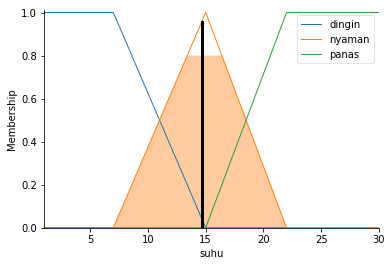

In [21]:
suhu.view(sim = suhu_ruangan)

 <div class="alert alert-success">
<div>

Seperti pada Visualisasi diatas, Nilai defuzzyfkasi **suhu ruangan adalah 14.66 C. ** Sesuai dengan gambar jika hasil output sebesar 14.66 C maka akan menghasilkan suhu ruangan yang nyaman.


 <div class="alert alert-success">
<div>

untuk output pertama python (komputasi) memiliki nilai sebesar 14.66 C, sedangkan dengan penghitungan manual memilki nilai 14.22 C. selisih antara hitungan manual python dengan penghitungan komputasi sebesar 0.44 C